# Videogame Sales Analysis

### Library Imports

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading dataset

In [91]:
# Path to the dataset
file_path = 'Videogames_Sales.csv'

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

### Data exploration

In [94]:
print(df.head())

print(df.columns)

print(df.info())

                       Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Count  User_Score  User_Count Developer Rating

### Data Preparation

In [97]:
# Looking for nulls
print(df.isnull().sum())

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64


In [99]:
# Removing missing values
df = df.dropna()

## Which platform (gaming device) made the most sales?

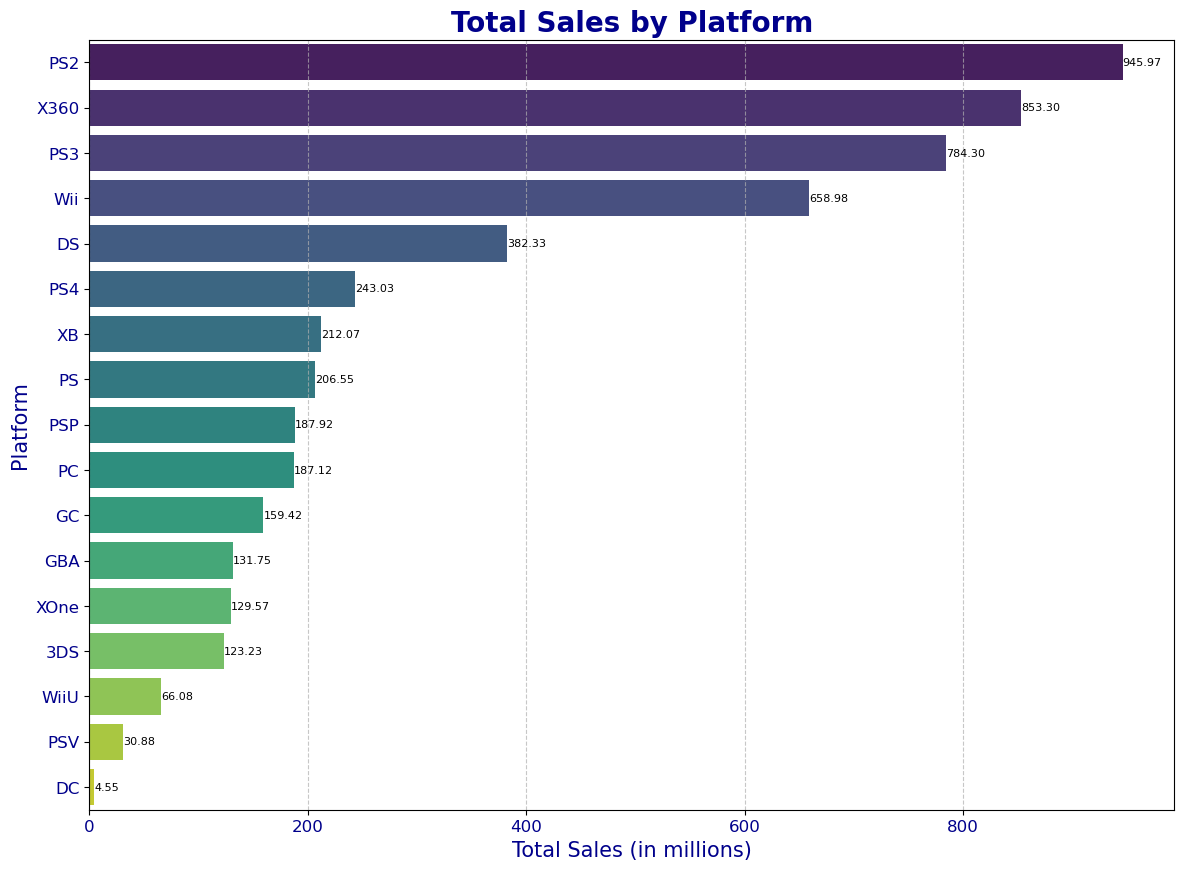

In [102]:
# Group the data by 'Platform' and sum the sales for each platform
platform_sales = df.groupby('Platform')['Global_Sales'].sum().reset_index()

platform_sales = platform_sales[platform_sales['Global_Sales'] > 0]

# Sort the data by sales in descending order
platform_sales = platform_sales.sort_values(by='Global_Sales', ascending=False)

plt.figure(figsize=(14, 10))
sns.barplot(x='Global_Sales', y='Platform', data=platform_sales, hue='Platform', dodge=False, palette='viridis')

for index, value in enumerate(platform_sales['Global_Sales']):
    plt.text(value, index, f'{value:.2f}', color='black', ha="left", va="center", fontsize=8)
    
#Making the plot look cleaner
plt.title('Total Sales by Platform', fontsize=20, fontweight='bold', color='darkblue')
plt.xlabel('Total Sales (in millions)', fontsize=15, color='darkblue')
plt.ylabel('Platform', fontsize=15, color='darkblue')
plt.xticks(fontsize=12, color='darkblue')
plt.yticks(fontsize=12, color='darkblue')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend([], [], frameon=False)
plt.show()

## Which publisher made the most games and how much were the total sales?

In [105]:
# Count the occurrences of each publisher name
publisher_counts = df['Publisher'].value_counts()

# Display the counts
print(publisher_counts)

# Identify the publisher with the most games
most_games_publisher = publisher_counts.idxmax()
most_games_count = publisher_counts.max()

# Display the result
print(f"Publisher with the most games: {most_games_publisher} with {most_games_count} games")

Publisher
Electronic Arts                944
Ubisoft                        496
Activision                     492
Sony Computer Entertainment    316
THQ                            307
                              ... 
Funbox Media                     1
O-Games                          1
Hasbro Interactive               1
NDA Productions                  1
NewKidCo                         1
Name: count, Length: 263, dtype: int64
Publisher with the most games: Electronic Arts with 944 games


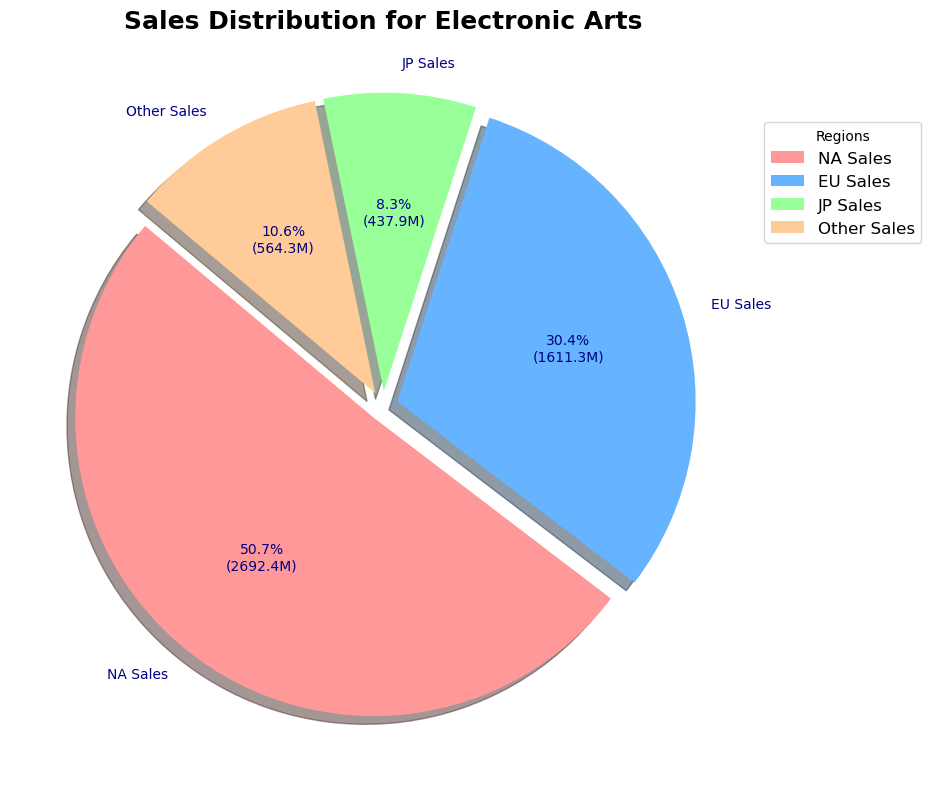

In [107]:
# Aggregate the sales data for the top publisher
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
sales_data = df[sales_columns].sum()

sales_data.index = sales_data.index.str.replace('_', ' ')

# Colors that pop
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

# Exploding Piechart
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(
    sales_data, 
    labels=sales_data.index, 
    autopct=lambda p: f'{p:.1f}%\n({p*sum(sales_data)/100:.1f}M)', 
    startangle=140, 
    colors=colors, 
    shadow=True, 
    explode=[0.05]*len(sales_data)
)

# Customize text
for text in texts + autotexts:
    text.set_fontsize(10)
    text.set_color('navy')

# Title and Equal Aspect Ratio
plt.title('Sales Distribution for Electronic Arts', fontsize=18, fontweight='bold', va='center')


# Add a legend
plt.legend(wedges, sales_data.index, title="Regions", loc="center left", bbox_to_anchor=(1, 0.8), fontsize=12)

plt.tight_layout()
plt.show()

## Has the sales for videogames gone up or down throughout the years?

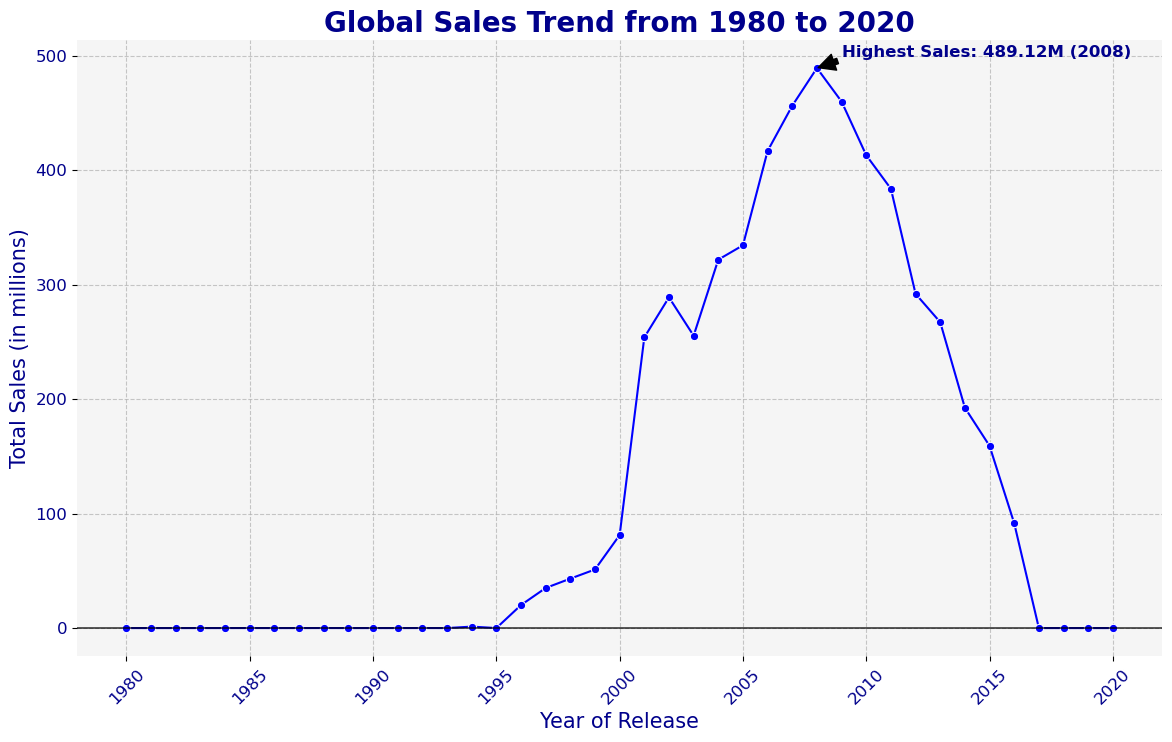

In [110]:
# Convert 'Year_of_Release' to numeric, handling any invalid values
df['Year_of_Release'] = pd.to_numeric(df['Year_of_Release'], errors='coerce')

# Filter the data for the years 1980 to 2020
df_filtered = df[(df['Year_of_Release'] >= 1980) & (df['Year_of_Release'] <= 2020)]

# Group the data by year and sum the sales
sales_by_year = df_filtered.groupby('Year_of_Release')['Global_Sales'].sum().reset_index()

# Create a DataFrame with all years from 1980 to 2020
all_years = pd.DataFrame({'Year_of_Release': range(1980, 2021)})

# Merge the sales data with all_years to include years with zero sales
sales_by_year = pd.merge(all_years, sales_by_year, on='Year_of_Release', how='left').fillna(0)

# Line Plot
plt.figure(figsize=(14, 8))
sns.lineplot(data=sales_by_year, x='Year_of_Release', y='Global_Sales', marker='o', color='b')
plt.title('Global Sales Trend from 1980 to 2020', fontsize=20, fontweight='bold', color='darkblue')
plt.xlabel('Year of Release', fontsize=15, color='darkblue')
plt.ylabel('Total Sales (in millions)', fontsize=15, color='darkblue')
plt.xticks(fontsize=12, color='darkblue', rotation=45)
plt.yticks(fontsize=12, color='darkblue')
plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(y=0, color='black', linewidth=1.3, alpha=0.7)
sns.despine(left=True, bottom=True)

# Background Color
plt.gca().set_facecolor('#f5f5f5')

# Highest sales year
max_sales_year = sales_by_year.loc[sales_by_year['Global_Sales'].idxmax()]
plt.annotate(f'Highest Sales: {max_sales_year["Global_Sales"]:.2f}M (2008)',
             xy=(max_sales_year['Year_of_Release'], max_sales_year['Global_Sales']),
             xytext=(max_sales_year['Year_of_Release']+1, max_sales_year['Global_Sales']+10),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12, color='darkblue', fontweight='bold')

plt.show()

#### *Note that the graph goes down not because the sales dropped but because of the limited data we have in this set

# What are the top 10 games that scored the highest with the critic and the users?

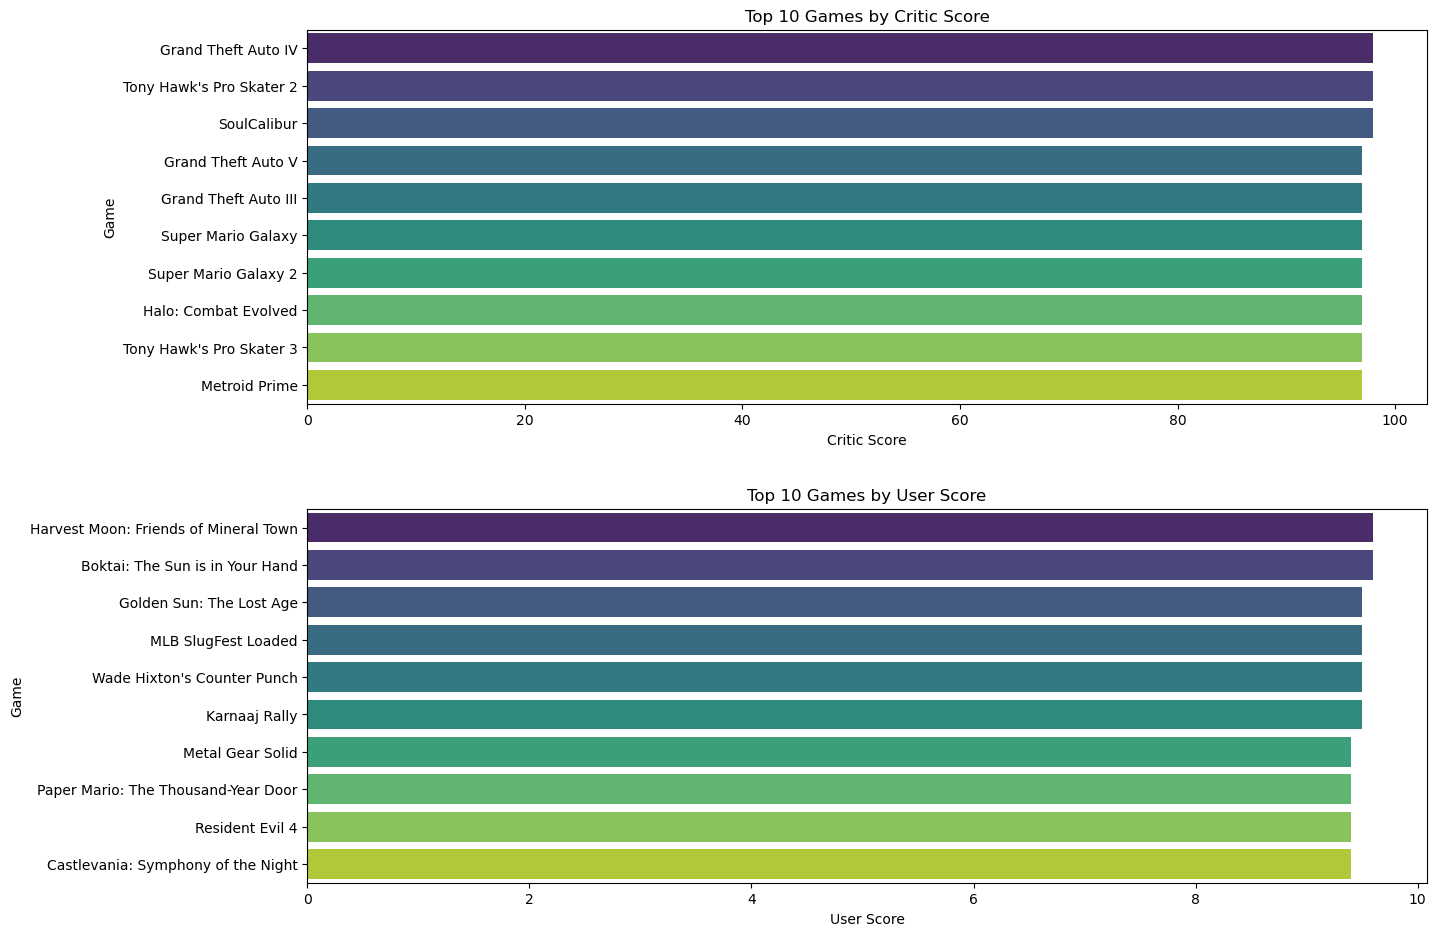

In [114]:
plt.figure(figsize=(15, 10))

# Critic Score Plot
plt.subplot(2, 1, 1)
sns.barplot(x='Critic_Score', y='Name', data=top_critic_games, hue='Name', palette='viridis', dodge=False, legend=False)
plt.title('Top 10 Games by Critic Score')
plt.xlabel('Critic Score')
plt.ylabel('Game')

# User Score Plot
plt.subplot(2, 1, 2)
sns.barplot(x='User_Score', y='Name', data=top_user_games, hue='Name', palette='viridis', dodge=False, legend=False)
plt.title('Top 10 Games by User Score')
plt.xlabel('User Score')
plt.ylabel('Game')

plt.tight_layout(pad=3.0)
plt.show()

#### *Note that the critics list of games are completley different from the users list of games

# Which genre of game made the most in sales?

In [131]:
# Group the data by 'Genre' and sum the global sales for each genre
genre_sales = df.groupby('Genre')['Global_Sales'].sum().reset_index()

# Find the genre with the highest total sales
top_genre = genre_sales.loc[genre_sales['Global_Sales'].idxmax()]

# Display the results
print(f"The genre with the highest total sales is {top_genre['Genre']} with {top_genre['Global_Sales']} million units sold.")

The genre with the highest total sales is Action with 1745.27 million units sold.


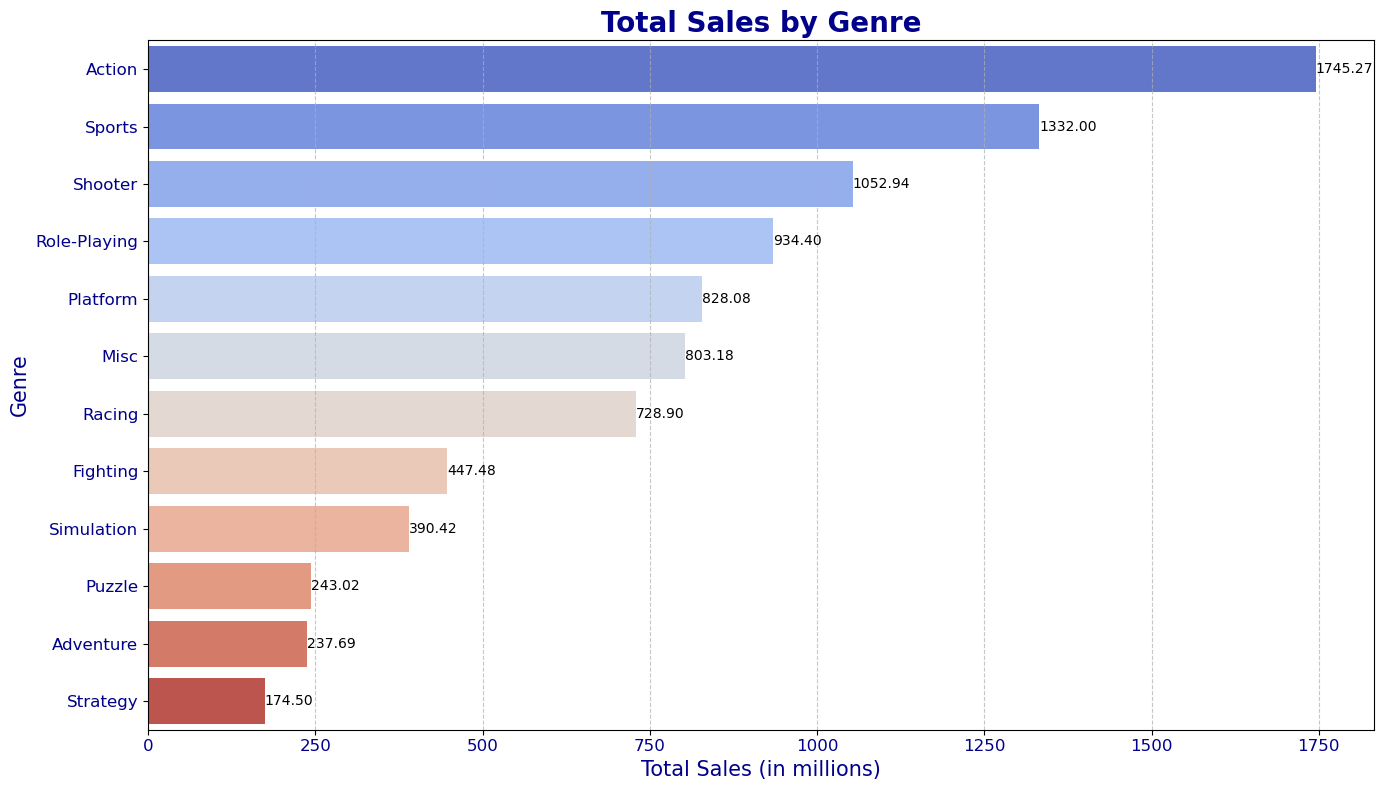

In [133]:
# Group the data by 'Genre' and sum the global sales for each genre
genre_sales = df.groupby('Genre')['Global_Sales'].sum().reset_index()

# Sort the genres by sales in descending order
genre_sales = genre_sales.sort_values(by='Global_Sales', ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(x='Global_Sales', y='Genre', data=genre_sales, hue='Genre', dodge=False, palette='coolwarm', legend=False)
plt.title('Total Sales by Genre', fontsize=20, fontweight='bold', color='darkblue')
plt.xlabel('Total Sales (in millions)', fontsize=15, color='darkblue')
plt.ylabel('Genre', fontsize=15, color='darkblue')
plt.xticks(fontsize=12, color='darkblue')
plt.yticks(fontsize=12, color='darkblue')
plt.grid(axis='x', linestyle='--', alpha=0.7)
for index, value in enumerate(genre_sales['Global_Sales']):
    plt.text(value, index, f'{value:.2f}', color='black', ha="left", va="center")

plt.tight_layout()
plt.show()

# Thank you!